In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Define our population

In [2]:
def plot_hist(x, edgecolor='k', nbins=20):
    plt.figure(figsize=(10,8))
    plt.hist(x, edgecolor=edgecolor, bins=nbins)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
N = 10000  # total population

### Create the population

population = np.random.randint(0, 201, N)

In [34]:
mu = population.mean()

sigma = population.std()

print(f"Population mean: {mu}, population std. deviation: {sigma}")

Population mean: 100.0985, population std. deviation: 57.88892292787973


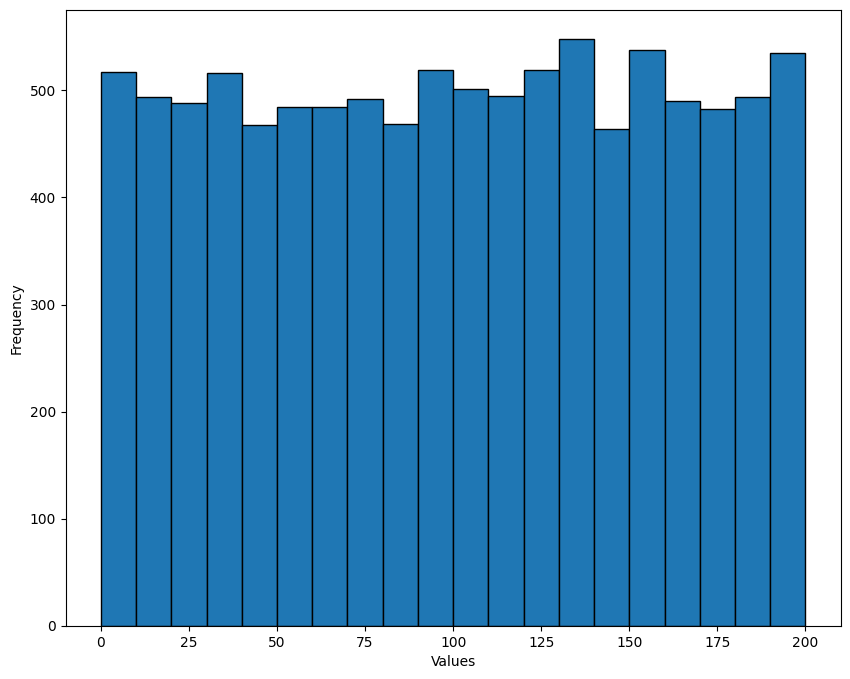

In [21]:
plot_hist(population)

In [6]:
def sampling(population, sample_size, replace=True):

    sample = np.random.choice(population, sample_size, replace=replace)
    return sample

In [23]:
sample1 = sampling(population, sample_size=25)

sample1

array([128, 138, 131, 138, 186, 150,  20,  97, 161, 108,  29, 155, 187,
        79,  67, 132,  74,  56, 160, 169,   4, 164, 191, 103,  89],
      dtype=int32)

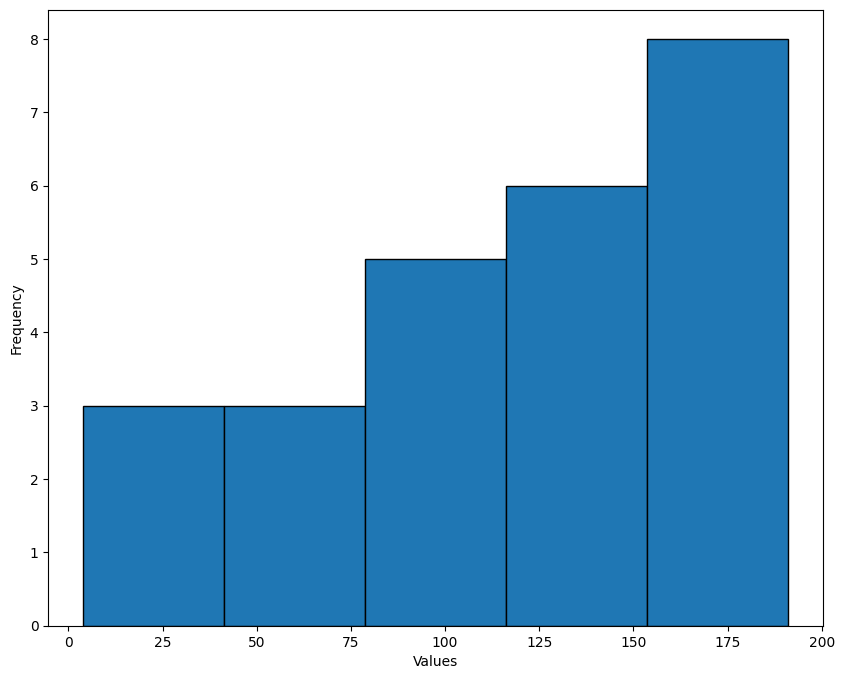

In [24]:
plot_hist(sample1, 'k', 5)

In [25]:
sample2 = sampling(population, sample_size=25)

sample2

array([159, 130, 122, 143, 162, 158, 104,  94,  57, 116, 150,   4, 148,
        58, 124,  21, 173, 152, 134, 137,   2,  77,  14,  30, 112],
      dtype=int32)

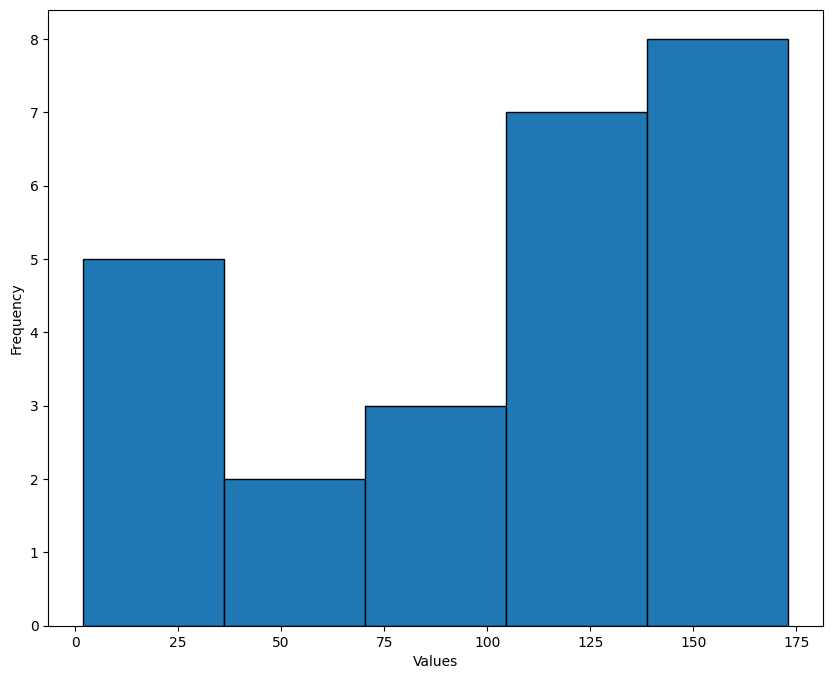

In [27]:
plot_hist(sample2, 'k', 5)

In [28]:
mean1 = sample1.mean()

mean2 = sample2.mean()

In [29]:
mean1, mean2

(np.float64(116.64), np.float64(103.24))

In [30]:
def repeated_sampling(population, sample_size, number_of_rep):
    """
    It will take number of samples from the population with the specified sample size
    and will compute mean of those samples.
    Returns a list of those sample means.
    """
    sample_mean_list = []

    for i in range(number_of_rep):
        sample = sampling(population, sample_size, replace=True)
        sample_mean = sample.mean()
        sample_mean_list.append(sample_mean)

    return sample_mean_list

In [31]:
sample_mean_list = repeated_sampling(population, sample_size=25, number_of_rep=100)

In [32]:
avg_sample_mean = sum(sample_mean_list)/len(sample_mean_list)

avg_sample_mean

np.float64(100.06520000000002)

In [33]:
mu

np.float64(100.0985)

In [36]:
### standard deviation of the sample mean (standard error)

np.array(sample_mean_list).std()

np.float64(11.694115655319989)

In [37]:
sigma

np.float64(57.88892292787973)

In [38]:
sigma/5

np.float64(11.577784585575946)

In [39]:
sample_mean_list2 = repeated_sampling(population, sample_size=100, number_of_rep=100)

In [41]:
sum(sample_mean_list2)/len(sample_mean_list2)

np.float64(99.32209999999995)

In [42]:
mu

np.float64(100.0985)

In [43]:
np.array(sample_mean_list2).std()

np.float64(6.117126497792898)

### Central limit theorem

In [57]:
sample_mean_list = repeated_sampling(population, sample_size=20, number_of_rep=5000)

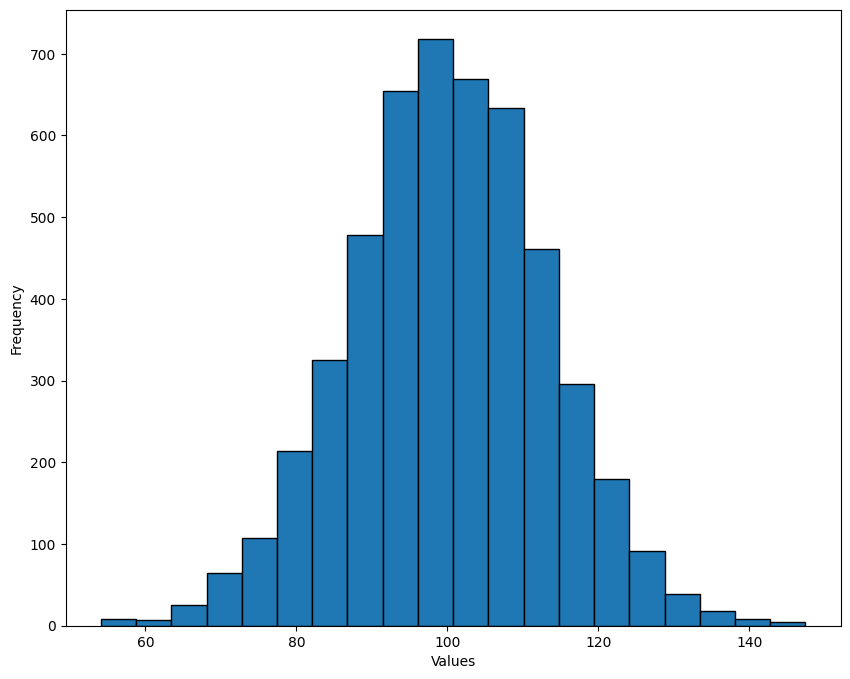

In [58]:
plot_hist(sample_mean_list)

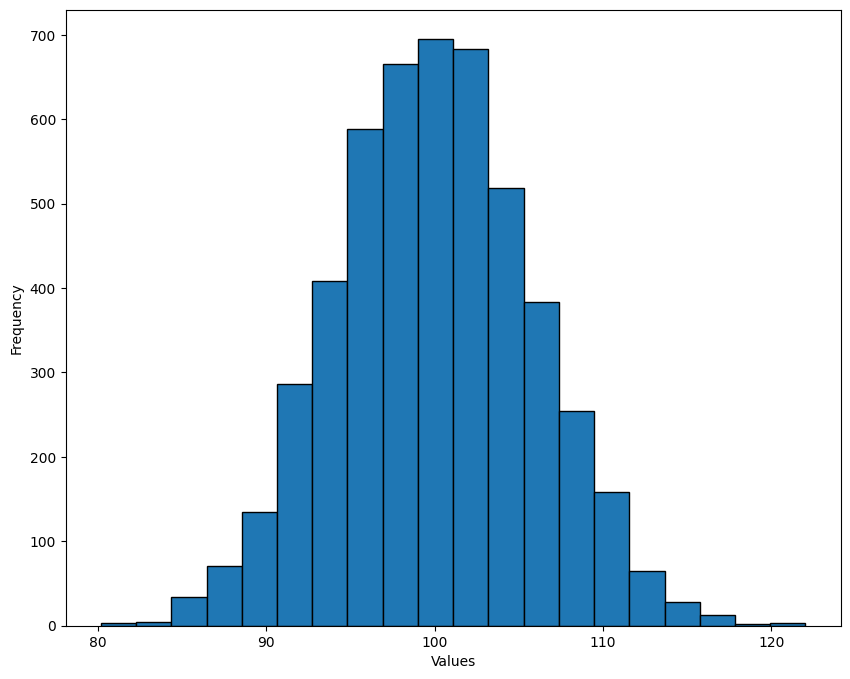

In [59]:
sample_mean_list = repeated_sampling(population, sample_size=100, number_of_rep=5000)

plot_hist(sample_mean_list)

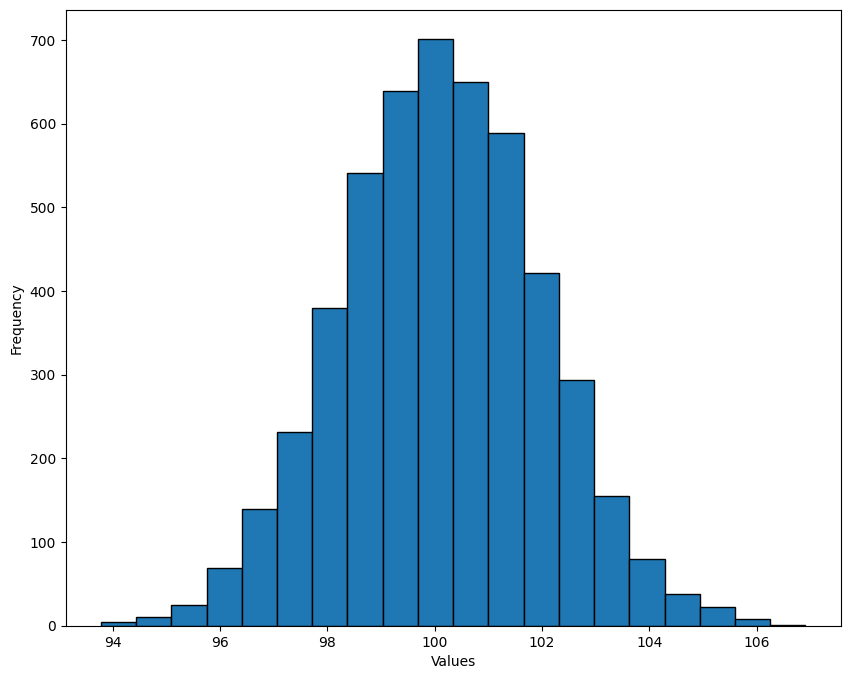

In [60]:
sample_mean_list = repeated_sampling(population, sample_size=1000, number_of_rep=5000)

plot_hist(sample_mean_list)

In [61]:
data = pd.read_csv("./weight-height.csv")

data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [63]:
len(data)

10000

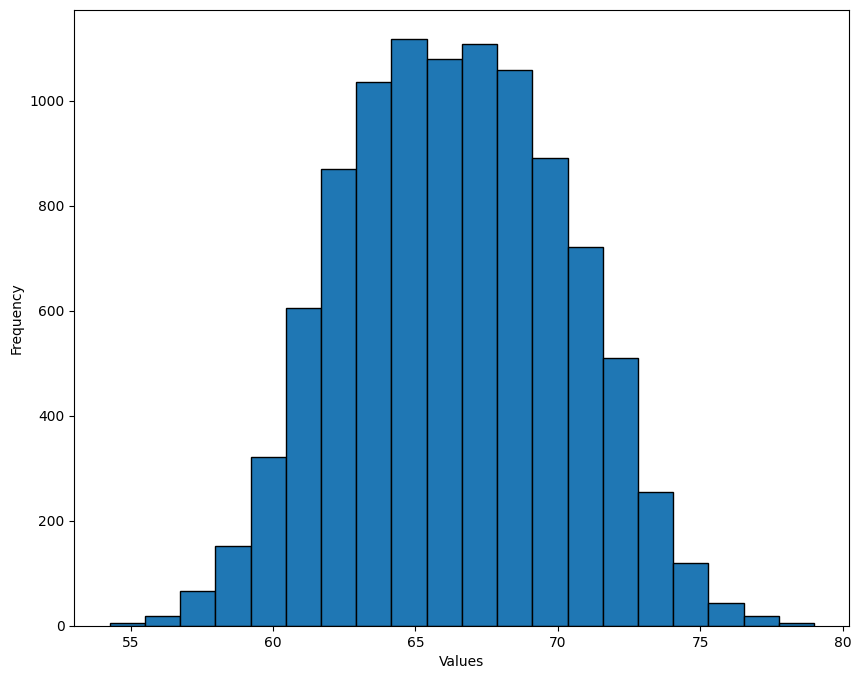

In [62]:
plot_hist(data['Height'])

In [64]:
pop_height_mean = data['Height'].mean()

pop_height_std = data['Height'].std()

print(pop_height_mean, pop_height_std)

66.36755975482124 3.8475281207732293


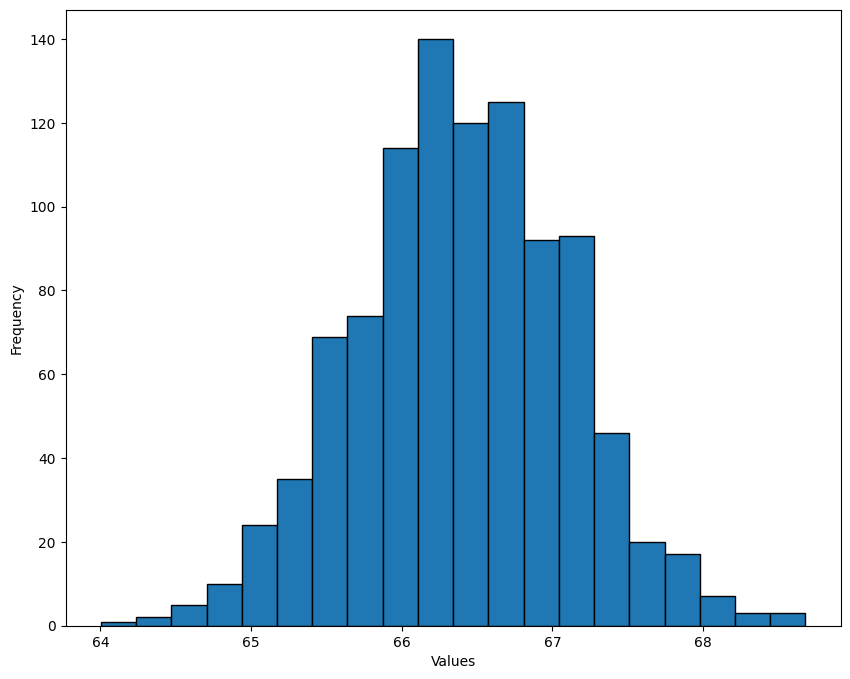

In [65]:
sample_height_mean_list = repeated_sampling(population=data['Height'].values, sample_size=30, number_of_rep=1000)

plot_hist(sample_height_mean_list)

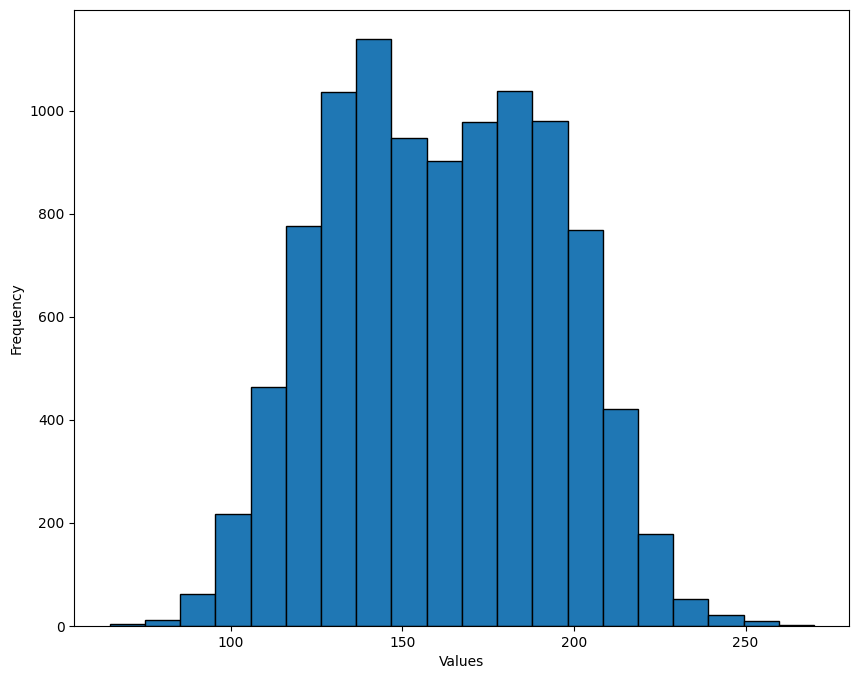

In [66]:
plot_hist(data['Weight'])

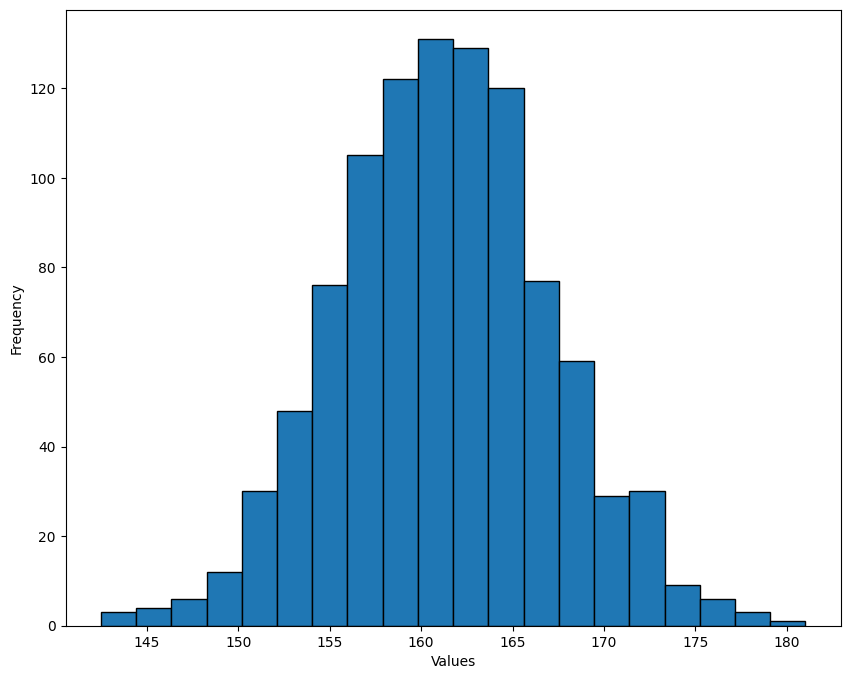

In [67]:
sample_weight_mean_list =  repeated_sampling(population=data['Weight'].values, sample_size=30, number_of_rep=1000)

plot_hist(sample_weight_mean_list)

### Sample standard deviation

In [ ]:
sigma_h = data['Height'].std()    # population standard deviation

print(sigma_h)

3.8475281207732293


formula-1:

$$s = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar x)^2} $$


formula-2:

$$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar x)^2} $$

In [74]:
def calculate_sample_std_deviation(population, sample_size, num_of_rep):

    sample_std_deviation_using_formula_1 = []

    sample_std_deviation_using_formula_2 = []

    def avg(X):
        return sum(X)/len(X)

    for i in range(num_of_rep):
        sample = np.random.choice(population, sample_size)
        s1 = sample.std()
        s2 = sample.std(ddof=1)

        sample_std_deviation_using_formula_1.append(s1)
        sample_std_deviation_using_formula_2.append(s2)

    return avg(sample_std_deviation_using_formula_1), avg(sample_std_deviation_using_formula_2)

In [79]:
s1, s2 = calculate_sample_std_deviation(data['Height'].values, sample_size=20, num_of_rep=100)

In [81]:
print(f"Mean of sample standard deviation using formula-1 (s1): {s1}, \nMean of sample standard deviation using formula-2 (s2): {s2}")

Mean of sample standard deviation using formula-1 (s1): 3.655789658197942, 
Mean of sample standard deviation using formula-2 (s2): 3.750761049087872


We can see that the mean of sample standard deviation using formula-1 is lower as compared to the same computed with formula-2.

Now, the population standard deviation is `sigma_h = 3.84`, which is close to the value s2 than s1. 

#### Mathematical proof:

Let $X_1, X_2, X_3, ... , X_n$ are i.i.d. random variables from a population with mean $\mu$ and variance $\sigma^2$.

Then sample mean, $\bar X = \frac{1}{n} \sum_{i=1}^{n} X_i $  is an unbiased estimator of population mean $\mu$.

because $ \mathbb{E}[X] = \mu$. 

Now, let $S_n^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar X)^2 $,

Then we can show that $ \mathbb{E}[S_n^2] \neq \sigma^2 $, i.e. $S_n^2$ is not an unbiased estimator of $\sigma^2$.

Moreover, we can also show that $bias(S_n^2) = -\frac{\sigma^2}{n}$,  ([proof link](https://proofwiki.org/wiki/Bias_of_Sample_Variance))

i.e. $\mathbb{E}[S_n^2] - \sigma^2 = -\frac{\sigma^2}{n}$

or, $\mathbb{E}[S_n^2] = \sigma^2 -\frac{\sigma^2}{n}$

or, $\mathbb{E}[S_n^2] = \frac{n-1}{n} \sigma^2$

or, $\mathbb{E}[\frac{n}{n-1} S_n^2] = \sigma^2$

or, $\mathbb{E}[\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar X)^2] = \sigma^2$.

Hence, 

if we define sample variance as $S_n^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar X)^2$ then it becomes an unbiased estimator of the population variance $\sigma^2$.